In [10]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import requests
import json
from datetime import datetime

In [12]:
# Reading the final dataset NYbike_trips_Q3.csv

filepath = '/Users/vineetasinha/Documents/workspace/NYCitiBike/NYbike_trips_Q3.csv'
df_NYTrips_Q3 = pd.read_csv(filepath)


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_810/925676775.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_NYTrips_Q3 = pd.read_csv(filepath)


In [15]:
print(df_NYTrips_Q3.duplicated())

0           False
1           False
2           False
3           False
4           False
            ...  
10326888    False
10326889    False
10326890    False
10326891    False
10326892    False
Length: 10326893, dtype: bool


In [79]:
df_NYTrips_Q3.shape


(10326893, 16)

In [19]:
# Count missing values per column
missing_values_count = df_NYTrips_Q3.isnull().sum()

# Display count of missing values
print("Missing values count per column:")
print(missing_values_count)


Missing values count per column:
ride_id                     0
rideable_type               0
started_at            5958665
ended_at                    0
start_station_name         41
start_station_id           41
end_station_name        24752
end_station_id          24752
start_lat                   0
start_lng                   0
end_lat                  9462
end_lng                  9462
member_casual               0
Date                  5958665
AvgTemp               5958667
_merge                      0
dtype: int64


In [22]:
df_cleaned = df_NYTrips_Q3.dropna(subset=['started_at'])
df_cleaned = df_NYTrips_Q3.dropna(subset=['Date'])
df_cleaned = df_NYTrips_Q3.dropna(subset=['AvgTemp'])


In [24]:
missing_values_count = df_cleaned.isnull().sum()

# Display count of missing values
print("Missing values count per column:")
print(missing_values_count)


Missing values count per column:
ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name        5
start_station_id          5
end_station_name      10320
end_station_id        10320
start_lat                 0
start_lng                 0
end_lat                3962
end_lng                3962
member_casual             0
Date                      0
AvgTemp                   0
_merge                    0
dtype: int64


In [29]:
df_cleaned.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Date,AvgTemp,_merge
0,0CC1D7F53FA21F9A,electric_bike,2022-02-11 05:54:11.481,2022-11-02 06:08:27.471,Park Ave & E 162 St,8016.07,Jerome Ave & W 193 St,8619.02,40.825701,-73.915644,40.866590,-73.897940,casual,2022-02-11,8.6,both
1,EDAECDAE6BF903DE,classic_bike,2022-02-11 18:20:15.611,2022-11-02 19:00:24.787,Broadway & W 61 St,7014.12,Leonard St & Church St,5359.11,40.770030,-73.981968,40.717571,-74.005549,casual,2022-02-11,8.6,both
2,37C06FED49069B80,electric_bike,2022-04-11 18:39:39.873,2022-11-04 18:44:01.851,W 54 St & 11 Ave,6955.05,11 Ave & W 59 St,7059.01,40.768333,-73.992573,40.771497,-73.990460,member,2022-04-11,8.8,both
3,63751973E9A95FB1,classic_bike,2022-09-11 18:02:29.616,2022-11-09 18:19:28.693,Broadway & W 41 St,6560.01,11 Ave & W 59 St,7059.01,40.755136,-73.986580,40.771497,-73.990460,member,2022-09-11,23.2,both
4,F7410DEDF925FBA8,electric_bike,2022-12-11 10:23:11.805,2022-11-12 10:28:24.794,William St & Pine St,5065.12,Leonard St & Church St,5359.11,40.707317,-74.008854,40.717571,-74.005549,member,2022-12-11,3.4,both


In [33]:

df_cleaned['started_at'] = pd.to_datetime(df_cleaned['started_at'])
df_cleaned['ended_at'] = pd.to_datetime(df_cleaned['ended_at'],format='%Y-%d-%m %H:%M:%S.%f', errors='coerce')

df_cleaned.head(10)


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_810/1951119096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['started_at'] = pd.to_datetime(df_cleaned['started_at'])
/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_810/1951119096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ended_at'] = pd.to_datetime(df_cleaned['ended_at'],format='%Y-%d-%m %H:%M:%S.%f', errors='coerce')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Date,AvgTemp,_merge
0,0CC1D7F53FA21F9A,electric_bike,2022-02-11 05:54:11.481,2022-02-11 06:08:27.471,Park Ave & E 162 St,8016.07,Jerome Ave & W 193 St,8619.02,40.825701,-73.915644,40.866590,-73.897940,casual,2022-02-11,8.6,both
1,EDAECDAE6BF903DE,classic_bike,2022-02-11 18:20:15.611,2022-02-11 19:00:24.787,Broadway & W 61 St,7014.12,Leonard St & Church St,5359.11,40.770030,-73.981968,40.717571,-74.005549,casual,2022-02-11,8.6,both
2,37C06FED49069B80,electric_bike,2022-04-11 18:39:39.873,2022-04-11 18:44:01.851,W 54 St & 11 Ave,6955.05,11 Ave & W 59 St,7059.01,40.768333,-73.992573,40.771497,-73.990460,member,2022-04-11,8.8,both
3,63751973E9A95FB1,classic_bike,2022-09-11 18:02:29.616,2022-09-11 18:19:28.693,Broadway & W 41 St,6560.01,11 Ave & W 59 St,7059.01,40.755136,-73.986580,40.771497,-73.990460,member,2022-09-11,23.2,both
4,F7410DEDF925FBA8,electric_bike,2022-12-11 10:23:11.805,2022-12-11 10:28:24.794,William St & Pine St,5065.12,Leonard St & Church St,5359.11,40.707317,-74.008854,40.717571,-74.005549,member,2022-12-11,3.4,both
7,C5604ECFE6126956,electric_bike,2022-01-11 18:22:10.732,2022-01-11 18:26:12.445,Lenox Ave & W 126 St,7720.03,Adam Clayton Powell Blvd & W 138 St,7855.03,40.808304,-73.945335,40.816960,-73.942296,member,2022-01-11,-5.4,both
8,48B0A1F1BAF73919,electric_bike,2022-01-11 19:47:34.369,2022-01-11 19:53:12.219,6 Ave & 21 St,3628.11,5 Ave & 41 St,3306.03,40.660247,-73.990927,40.649983,-74.005144,member,2022-01-11,-5.4,both
10,CBEAD0BEE264FBBF,electric_bike,2022-03-11 17:19:21.417,2022-03-11 17:30:55.943,N 11 St & Kent Ave,5489.04,Richardson St & N Henry St,5433.03,40.722482,-73.959219,40.719079,-73.942237,member,2022-03-11,7.2,both
12,5CAAB24A9491D5AA,classic_bike,2022-06-11 16:48:29.186,2022-06-11 17:08:17.324,Clay Ave & Claremont Pkwy,8225.05,Southern Blvd & E 175 St,8196.02,40.839990,-73.905490,40.839335,-73.886445,member,2022-06-11,21.8,both
13,E7D97183B42170AC,electric_bike,2022-02-11 16:23:24.452,2022-02-11 16:30:08.792,University Pl & E 14 St,5905.14,Broadway & E 21 St,6098.1,40.734814,-73.992085,40.739888,-73.989586,member,2022-02-11,8.6,both


In [35]:
# converting the 'Date' column in the df_NYTrips_Q1 DataFrame to a datetime format. It includes an additional parameter errors='coerce', which handles any errors that may arise during the conversion.
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_810/1039090016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')


In [37]:
# creating a new DataFrame named daily_trips_q2 that contains the count of bike trips per day for the second quarter (Q2).
daily_trips_q3 = pd.DataFrame(df_cleaned.groupby(['Date'])['ride_id'].count()).reset_index()

In [39]:
# rename a column in the daily_trips_q2 from ride_id to bike_rides_daily
daily_trips_q3.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

# merging two DataFrames (df_NYTrips_Q2 and daily_trips_q2) on a common column, 'Date', while renaming a column from daily_trips_q1 in the process. The merge is performed using an outer join, and an additional column called 'merge_indicator' is added to indicate the source of each row.
df_2022_Q3 = df_cleaned.merge(daily_trips_q3.rename(columns = {'trip_id':'bike_rides_daily'}), on = 'Date', how = 'outer', indicator = 'merge_indicator')


In [41]:
print(df_2022_Q3['_merge'].value_counts(dropna = False))


_merge
both    4368226
Name: count, dtype: int64


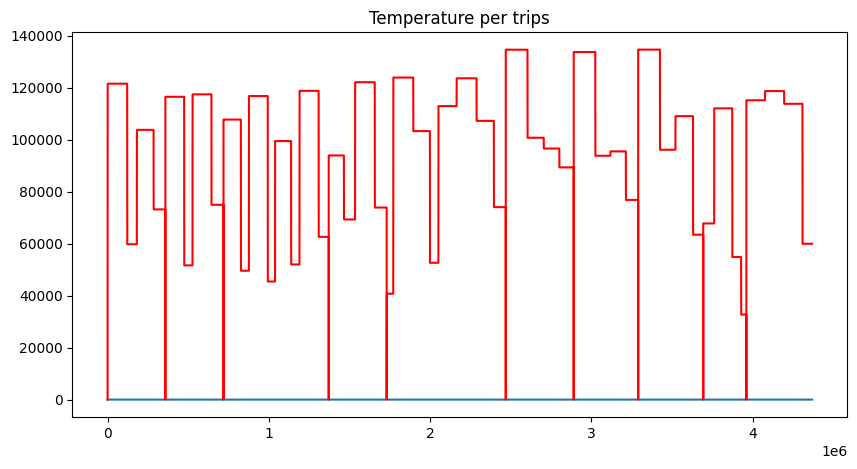

In [43]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_2022_Q3['AvgTemp'])
plt.plot(df_2022_Q3['bike_rides_daily'], color = 'red')
plt.show()

In [45]:
# inspecting the type of data stored in each column of df_2022_Q2.
df_2022_Q3.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
Date                  datetime64[ns]
AvgTemp                      float64
_merge                        object
bike_rides_daily               int64
merge_indicator             category
dtype: object

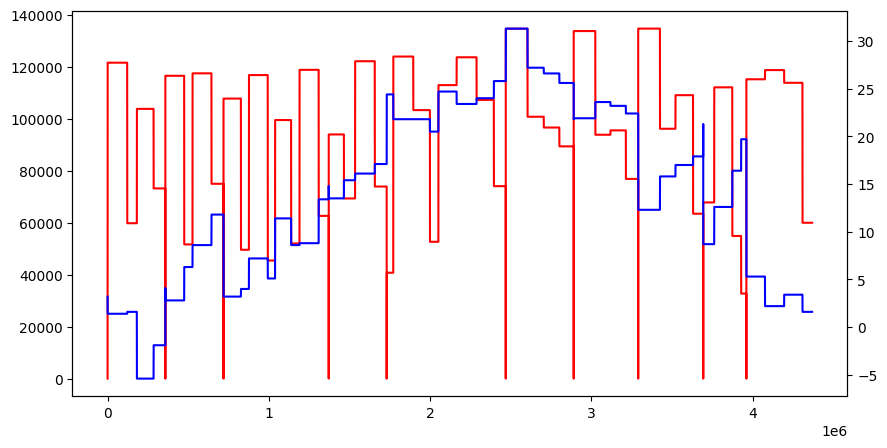

In [47]:
fig,ax = plt.subplots(figsize=(10, 5))
ax.plot(df_2022_Q3['bike_rides_daily'],color = "red")
ax2 = ax.twinx()
ax2.plot(df_2022_Q3["AvgTemp"], color = "blue")
plt.show()


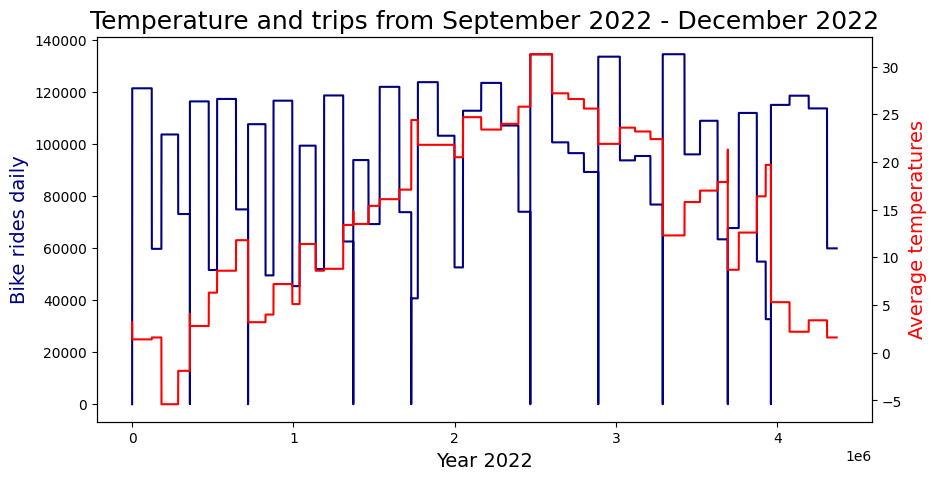

In [49]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_2022_Q3['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using second axis object
ax2.plot(df_2022_Q3['AvgTemp'], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips from September 2022 - December 2022', fontsize = 18)
plt.show()

To create a dual axis chart I used the object-oriented paradigm. I started by creating a figure and two axes objects using plt.subplots(). The two axes objects are necessary to plot on two different y-axes. I used the ax.plot() method to plot the trip counts against the date (or time). Next I used the ax1.twinx() method to create a second y-axis sharing the same x-axis. Then I used the ax2.plot() method to plot temperatures on the second y-axis.Finally I added titles & displayed the plot using plt.show().


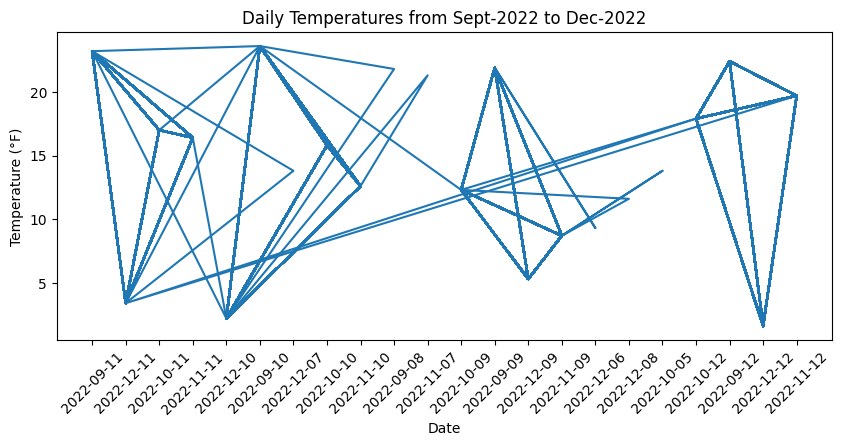

In [53]:
# filtering the df_NYTrips_Q1 DataFrame to create a subset (df_jan_2022) containing only the rows where the 'Date' column falls between January 1, 2022, and April 30, 2022.
df_Q3_2022 = df_NYTrips_Q3[(df_NYTrips_Q3['Date'] >= '2022-09-01') & (df_NYTrips_Q3['Date'] <= '2022-12-30')]

df_Q3_2022 = df_Q3_2022.set_index('Date')

# adjust the rendering settings for plots in Matplotlib when dealing with large datasets.
mpl.rcParams['agg.path.chunksize'] = 100000

# Optionally adjust the path.simplify_threshold 
mpl.rcParams['path.simplify_threshold'] = 1.0  

# Plot Average Temparature for the first quarter of 2022
plt.figure(figsize=(10,4))
plt.title('Daily Temperatures from Sept-2022 to Dec-2022')
plt.plot(df_Q3_2022 ['AvgTemp'])
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.ylabel('Temperature (°F)')
plt.show()




Bonus Task ----

In [56]:
# Changing the columns data into milisecond
df_cleaned['started_at']= df_cleaned['started_at'].astype(np.int64) // 10**6
df_cleaned['ended_at']= df_cleaned['ended_at'].astype(np.int64) // 10**6


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_810/1903270192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['started_at']= df_cleaned['started_at'].astype(np.int64) // 10**6
/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_810/1903270192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ended_at']= df_cleaned['ended_at'].astype(np.int64) // 10**6


In [59]:
df_cleaned.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Date,AvgTemp,_merge
0,0CC1D7F53FA21F9A,electric_bike,1644558851481,1644559707471,Park Ave & E 162 St,8016.07,Jerome Ave & W 193 St,8619.02,40.825701,-73.915644,40.866590,-73.897940,casual,2022-02-11,8.6,both
1,EDAECDAE6BF903DE,classic_bike,1644603615611,1644606024787,Broadway & W 61 St,7014.12,Leonard St & Church St,5359.11,40.770030,-73.981968,40.717571,-74.005549,casual,2022-02-11,8.6,both
2,37C06FED49069B80,electric_bike,1649702379873,1649702641851,W 54 St & 11 Ave,6955.05,11 Ave & W 59 St,7059.01,40.768333,-73.992573,40.771497,-73.990460,member,2022-04-11,8.8,both
3,63751973E9A95FB1,classic_bike,1662919349616,1662920368693,Broadway & W 41 St,6560.01,11 Ave & W 59 St,7059.01,40.755136,-73.986580,40.771497,-73.990460,member,2022-09-11,23.2,both
4,F7410DEDF925FBA8,electric_bike,1670754191805,1670754504794,William St & Pine St,5065.12,Leonard St & Church St,5359.11,40.707317,-74.008854,40.717571,-74.005549,member,2022-12-11,3.4,both


In [62]:
df_cleaned['started_at'] = df_cleaned['started_at'].astype(float)
df_cleaned['ended_at'] = df_cleaned['ended_at'].astype(float)

/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_810/3179172643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['started_at'] = df_cleaned['started_at'].astype(float)
/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_810/3179172643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ended_at'] = df_cleaned['ended_at'].astype(float)


In [66]:
# Calculating the trip duration
df_cleaned['tripduration'] = (df_cleaned['ended_at'] - df_cleaned['started_at'])/(1000 * 60)
print(df_cleaned['tripduration'])

0           14.266500
1           40.152933
2            4.366300
3           16.984617
4            5.216483
              ...    
10326884     4.729833
10326887    19.775167
10326888     4.002750
10326890     9.924233
10326891     6.747933
Name: tripduration, Length: 4368226, dtype: float64


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_810/2696168773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['tripduration'] = (df_cleaned['ended_at'] - df_cleaned['started_at'])/(1000 * 60)


<Figure size 900x500 with 0 Axes>

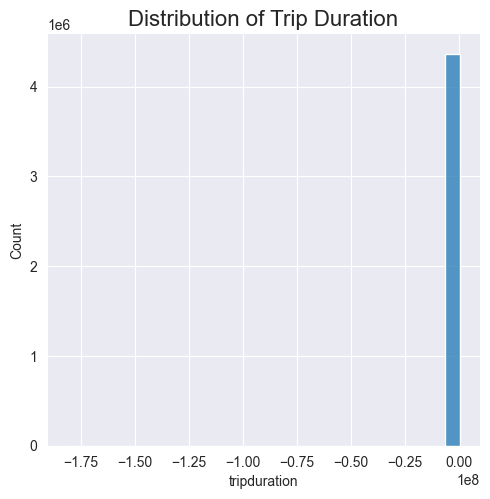

In [68]:
sns.set_style('darkgrid')
plt.figure(figsize=(9,5))
sns.displot(df_cleaned['tripduration'], bins = 25)
plt.title('Distribution of Trip Duration', fontsize=16)
plt.show()

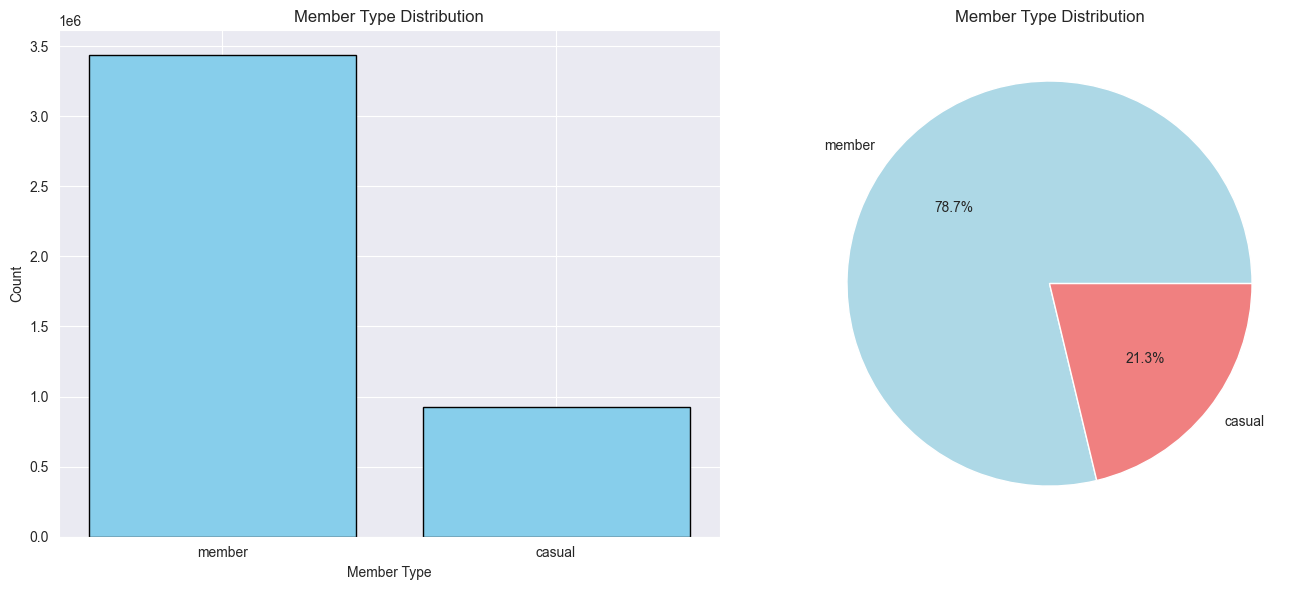

In [70]:
# # Convert 'Date' to datetime if needed
#df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Calculate counts for 'member_casual'
member_casual_counts = df_cleaned['member_casual'].value_counts()

# Create a figure with two subplots (axes)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot bar chart for 'member_casual' on the first axis
ax[0].bar(member_casual_counts.index, member_casual_counts.values, color='skyblue', edgecolor='black')
ax[0].set_title('Member Type Distribution')
ax[0].set_xlabel('Member Type')
ax[0].set_ylabel('Count')

# Plot pie chart for 'member_casual' on the second axis
ax[1].pie(member_casual_counts, labels=member_casual_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
ax[1].set_title('Member Type Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
df_cleaned.to_csv('/Users/vineetasinha/Documents/workspace/NYCitiBike/CleanedBikeTrips_Q3.csv', index=False)
